
<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Exercises/E03_overfit_regularization.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

---
# Overfit and regularization exercises 

---
These are introductory exercises in Machine learning with focus in **overfitting and regularization** .

<p class = "alert alert-info" role="alert"><b>Note</b> that sometimes you don't get exactly the same answer as I get, but it doesn't neccessarily mean it is wrong. Could be some parameters, randomization, that we have different. Also very important is that in the future there won't be any answer sheets, use your skills in data analysis, mathematics and statistics to back up your work.</p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 0. Tips data EDA (*)

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 

&nbsp; a) Start by doing some initial EDA such as info(), describe().

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 

&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.

<details>

<summary>Answer</summary>


b)
<img src="../assets/df_describe.png" height="300"/>

c) Here are some example plots

<img src="../assets/tips_EDA.png" height="300"/>

<img src="../assets/tips_smoke_sex.png" width="500"/>

<img src="../assets/tips_bar_sex.png" width="300"/>


d) For example: 
- there are almost double amount of females represented in the dataset
- there are very few tables with 1 person eating, and they usually give very low tip
- female and male tip somewhat similar

</details>

---

## 0. a) 

In [241]:
# Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 
# Do some initial EDA such as info(), describe().

import seaborn as sns 
import pandas as pd

df = pd.read_csv("/Users/paraugustsson/Machine-learning-AI24-1/tips.csv")  # Only reference 'data/' since .venv is the current folder
df.head()







,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [242]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## 0. b)

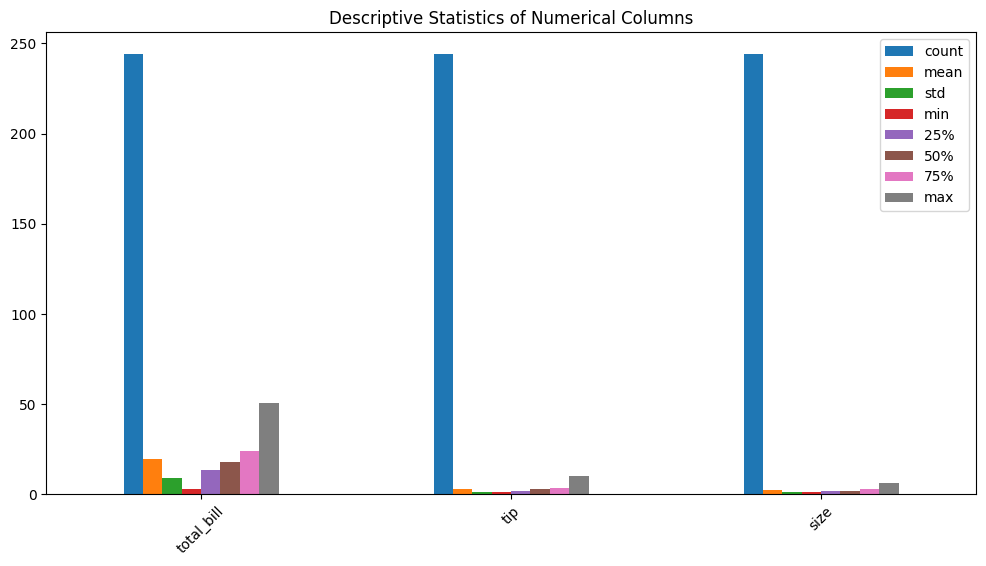

In [243]:
# Use describe only on those columns that are relevant to get statistical information from. 
# Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

import matplotlib.pyplot as plt

# rename 
tips_df = df 

# Select only numerical columns
numerical_cols = tips_df.select_dtypes(include=["number"]).columns

# Plot descriptive statistics using a barplot
tips_df[numerical_cols].describe().T.plot(kind="bar", figsize=(12, 6))
plt.title("Descriptive Statistics of Numerical Columns")
plt.xticks(rotation=45)
plt.show()

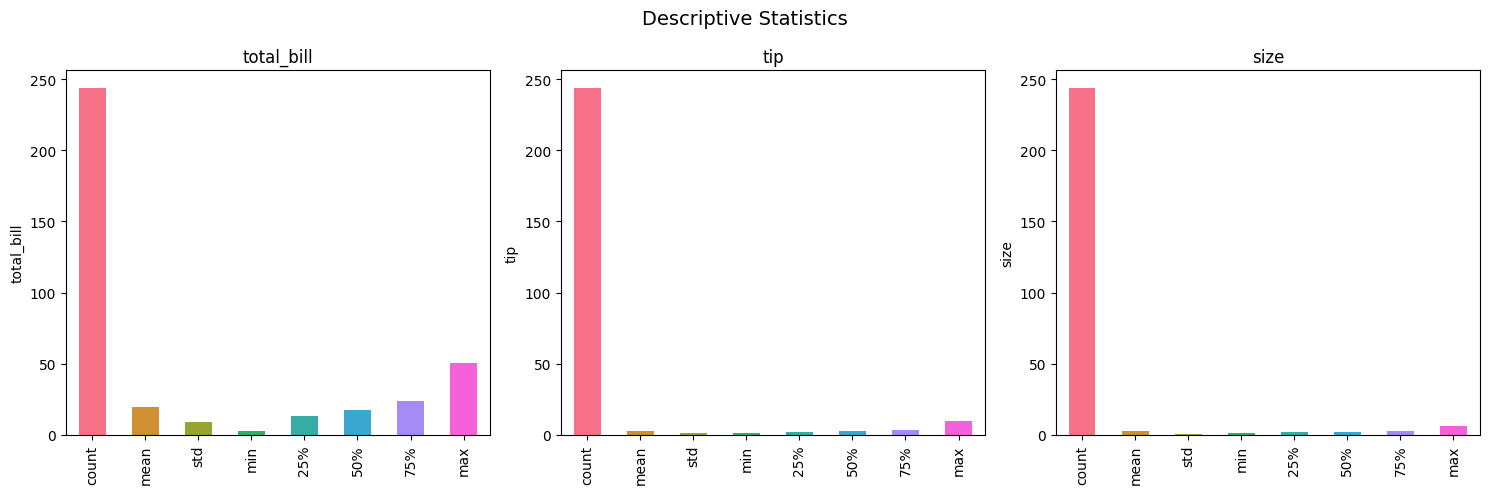

In [244]:
# Compute descriptive statistics

desc_stats = tips_df[numerical_cols].describe().T # Compute descriptive statistics for numerical columns and transpose the result

# Define a color palette for bars
bar_colors = sns.color_palette("husl", n_colors=len(desc_stats.columns))  # Husl gives distinct colors

# Plot each numerical column as a separate barplot with unique colors for each bar
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 5))

for ax, col in zip(axes, numerical_cols):
    desc_stats.loc[col].plot(kind="bar", ax=ax, color=bar_colors)  # Assign unique color to each bar
    ax.set_title(col)
    ax.set_ylabel(col)

# Set overall title
plt.suptitle("Descriptive Statistics", fontsize=14)
plt.tight_layout()
plt.show()

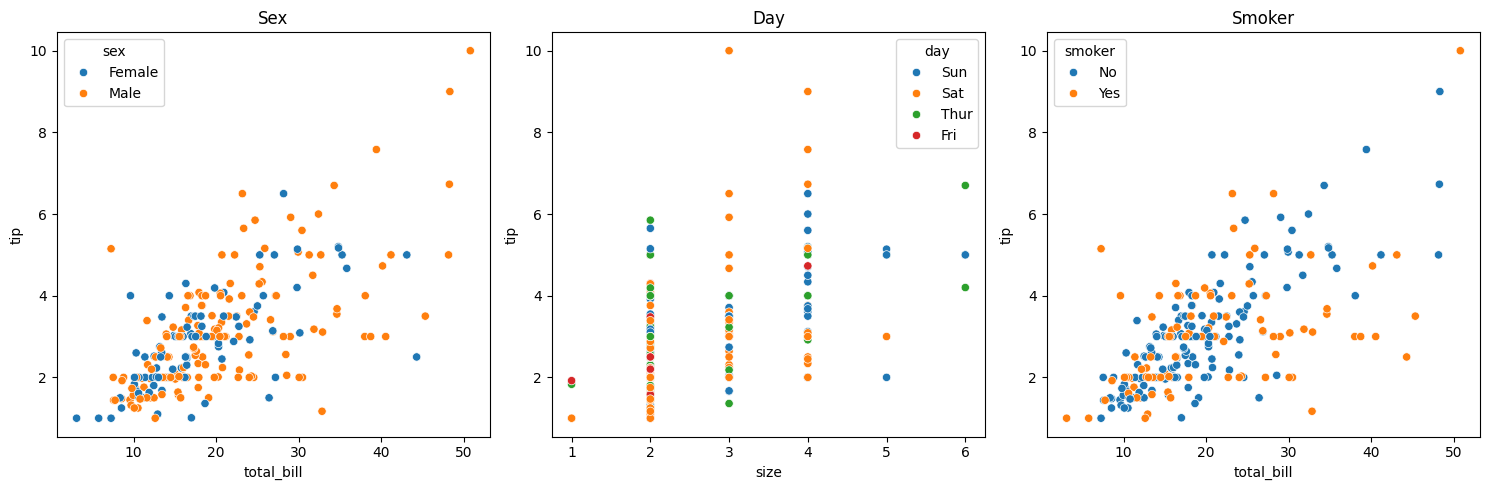

In [245]:
# Create subplots (3 side-by-side scatter plots)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot: Total bill vs. Tip, colored by 'sex'
sns.scatterplot(x="total_bill", y="tip", hue="sex", data=tips_df, ax=axes[0])
axes[0].set_title("Sex")

# Scatter plot: Size vs. Tip, colored by 'day'
sns.scatterplot(x="size", y="tip", hue="day", data=tips_df, ax=axes[1])
axes[1].set_title("Day")

# Scatter plot: Total bill vs. Tip, colored by 'smoker'
sns.scatterplot(x="total_bill", y="tip", hue="smoker", data=tips_df, ax=axes[2])
axes[2].set_title("Smoker")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

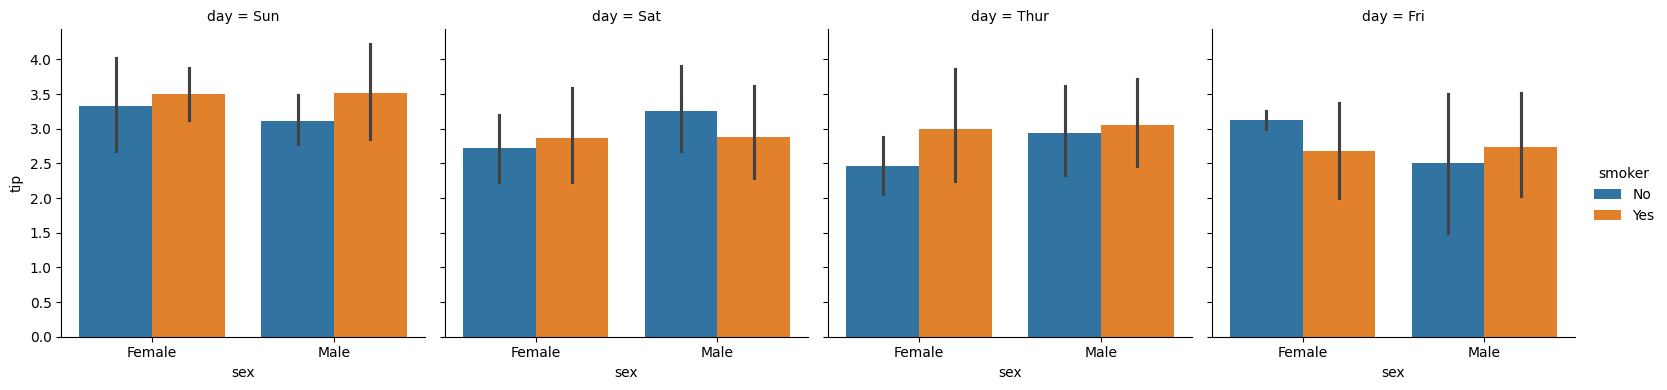

In [246]:
sns.catplot(
    x="sex", y="tip", hue="smoker", col="day",  # Group by 'sex', color by 'smoker', separate by 'day'
    data=tips_df, kind="bar", height=4, aspect=1  # Bar plot type, subplot height, and aspect ratio
)

plt.show()

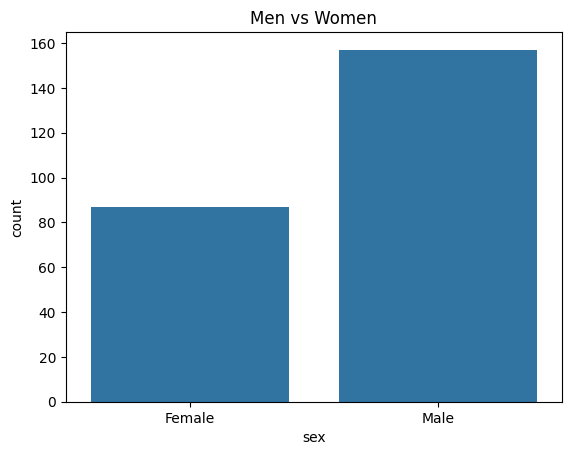

In [247]:
sns.countplot(x="sex", data=tips_df)
plt.title("Men vs Women")
plt.show()

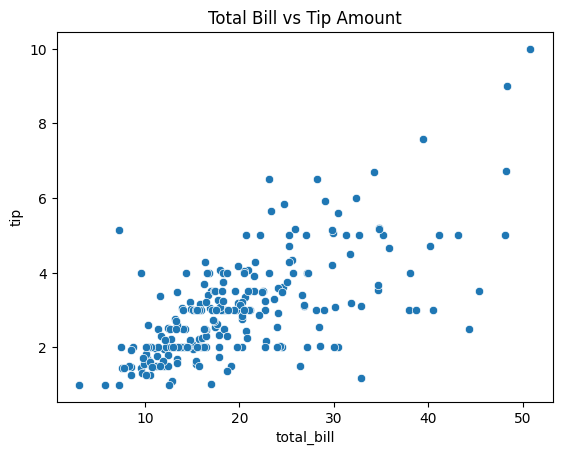

In [248]:
sns.scatterplot(x=tips_df["total_bill"], y=tips_df["tip"])
plt.title("Total Bill vs Tip Amount")
plt.show()

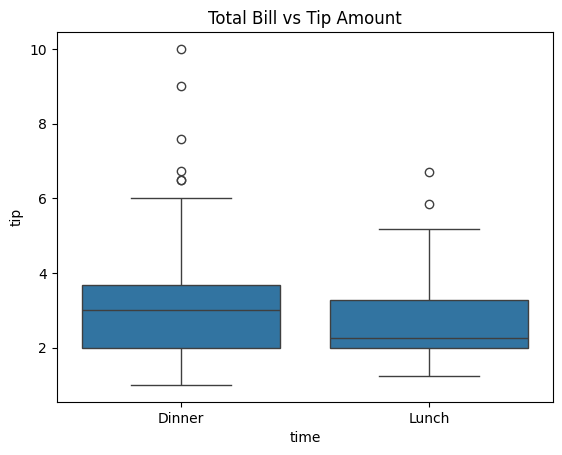

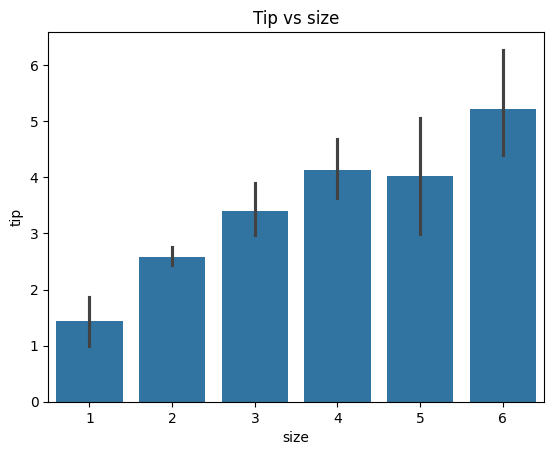

In [249]:
sns.boxplot(x=tips_df["time"], y=tips_df["tip"])
plt.title("Total Bill vs Tip Amount")
plt.show()

sns.barplot(x=tips_df["size"], y=tips_df["tip"])
plt.title("Tip vs size")
plt.show()

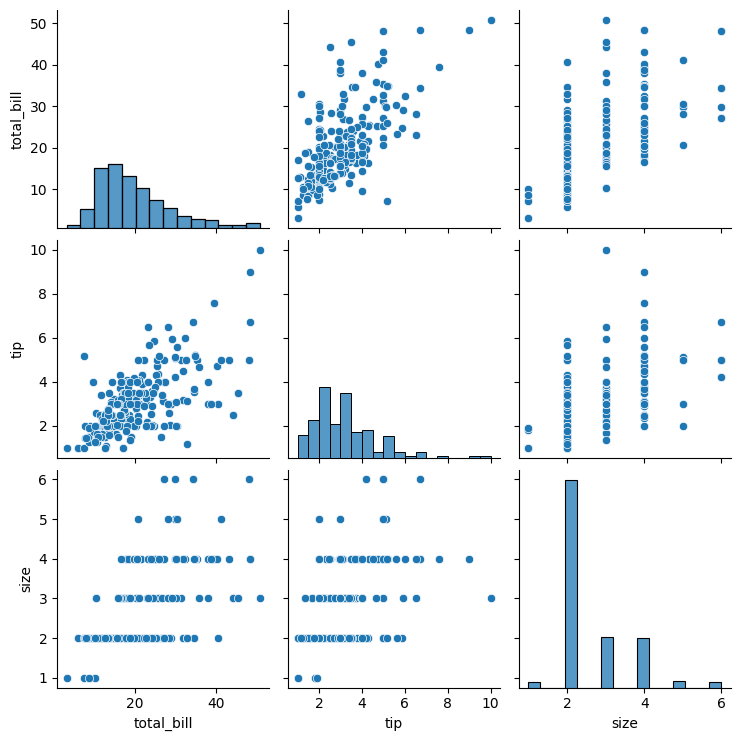

In [250]:
sns.pairplot(df)
plt.show()

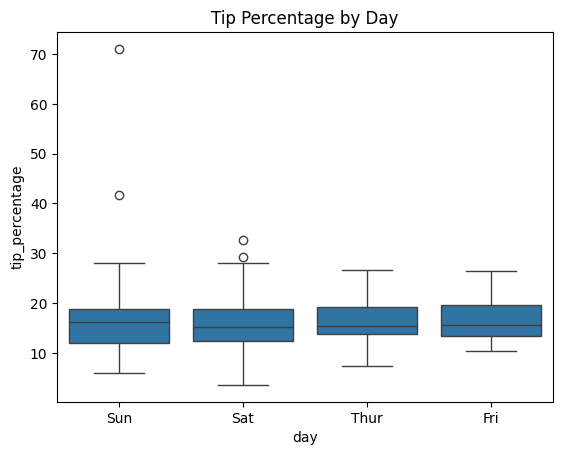

In [251]:
tips_prec = tips_df
tips_prec["tip_percentage"] = tips_prec["tip"] / tips_prec["total_bill"] * 100
sns.boxplot(x="day", y="tip_percentage", data=tips_prec)
plt.title("Tip Percentage by Day")
plt.show()

In [252]:
#tips_df.head()
tips_prec.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


In [253]:
tips_df = tips_prec.drop(columns=["tip_percentage"])


In [254]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 0. d)

For example: 
- there are almost double amount of females represented in the dataset
- there are very few tables with 1 person eating, and they usually give very low tip
- female and male tip somewhat similar


## 1. Train|test split (*)

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

## 1. )

In [255]:
from sklearn.model_selection import train_test_split



# Define features (X) and target (y)
X = tips_df.drop(columns=["tip"]) # features 
y = tips_df["tip"] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)


# Print the shapes of the split datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)





X_train shape: (170, 6)
X_test shape: (74, 6)
y_train shape: (170,)
y_test shape: (74,)


---
## 2. Feature standardization (*)

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?

<details>

<summary>Answer</summary>

scaled_X_train (total_bill, size) mean: [ 6.79195262e-17 -1.98534000e-16]

scaled_X_test (total_bill, size) mean: [-0.19137999 -0.04477934]

scaled_X_train (total_bill, size) std: [1. 1.]

scaled_X_test (total_bill, size) std: [0.92495673 1.06638889]

</details>

In [256]:
import numpy as np


# Select only numerical features for standardization
numerical_features = X_train.select_dtypes(include=[np.number]).columns

# Compute mean and standard deviation from training data
mu_train = X_train[numerical_features].mean()
sigma_train = X_train[numerical_features].std()

# Standardize the training and testing sets using training mean & std
X_train_scaled = (X_train[numerical_features] - mu_train) / sigma_train
X_test_scaled = (X_test[numerical_features] - mu_train) / sigma_train  # Avoid data leakage

# Compute the new mean and standard deviation after standardization
scaled_stats = {
    "X_train_scaled Mean": X_train_scaled.mean(),
    "X_train_scaled Std Dev": X_train_scaled.std(),
    "X_test_scaled Mean": X_test_scaled.mean(),
    "X_test_scaled Std Dev": X_test_scaled.std(),
}

# Convert results to DataFrame for better readability
scaled_stats_df = pd.DataFrame(scaled_stats)

# Display the results
print("Feature Standardization Results")
print(scaled_stats_df)

Feature Standardization Results
            X_train_scaled Mean  X_train_scaled Std Dev  X_test_scaled Mean  \
total_bill         6.791953e-17                     1.0           -0.191380   
size              -1.985340e-16                     1.0           -0.044779   

            X_test_scaled Std Dev  
total_bill               0.924957  
size                     1.066389  


---
## 3. Polynomial features (*)

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 


In [257]:
from sklearn.preprocessing import PolynomialFeatures

# Select numerical and categorical features separately
numerical_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns

# Standardize numerical features
mu_train = X_train[numerical_features].mean()
sigma_train = X_train[numerical_features].std()

X_train_scaled = (X_train[numerical_features] - mu_train) / sigma_train
X_test_scaled = (X_test[numerical_features] - mu_train) / sigma_train  # Use training mean & std

# Encode categorical features using One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train[categorical_features], drop_first=True)
X_test_encoded = pd.get_dummies(X_test[categorical_features], drop_first=True)

# Merge scaled numerical features and encoded categorical features
X_train_final = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_encoded], axis=1)

# Ensure train & test have the same columns
X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)

# Instantiate PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)

# Fit polynomial transformation on X_train' (standardized & encoded features)
poly.fit(X_train_final)

# Transform both X_train' and X_test' using the fitted transformation
X_train_poly = poly.transform(X_train_final)
X_test_poly = poly.transform(X_test_final)  # Using training fit

# Fit & transform X_test' separately (incorrect way for comparison)
X_test_poly_wrong = poly.fit_transform(X_test_final)  # Fitting on test data

# Compare the two transformed test sets (correct vs. incorrect approach)
comparison = (X_test_poly == X_test_poly_wrong).sum()

# Check if the transformation results are identical
match_percentage = comparison / X_test_poly.shape[0]

# Store results in a dictionary
poly_comparison_results = {
    "Total Features": X_test_poly.shape[1],
    "Matching Values Count": comparison,
    "Match Percentage": match_percentage
}

# Convert results to DataFrame for better readability
poly_comparison_df = pd.DataFrame([poly_comparison_results])

# Display the results
from IPython.display import display

# Display the results using IPython display
display(poly_comparison_df)

,Total Features,Matching Values Count,Match Percentage
0,45,3330,45.0


---
## 4. Polynomial regression  (*)

We will now investigate the training loss and testing loss for different degrees of polynomial. Loop through degrees 1 to 4 (inclusive) and:
- instantiate an object of PolynomialFeatures with that degree
- fit and transform $X_{train}'$ and $X_{test}$ to create polynomial features
- perform linear regression on these polynomial features (polynomial regression)
- predict on both the training and testing data to record RMSE for training and testing for each iteration of the loop

Now plot the results in the same figure. Do you notice anything special? 

<details>

<summary>Answer</summary>

<img src="../assets/E3_overfitting.png" height="300"/>

</details>

## 4)

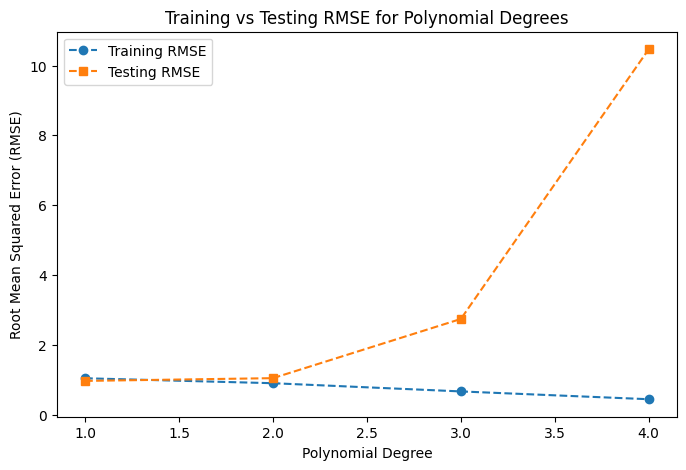

In [259]:
#import necessary libraries 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define degrees to test
degrees = [1, 2, 3, 4]

# Store RMSE values for training and testing
train_rmse = []
test_rmse = []

# Loop through polynomial degrees
for degree in degrees:
    # Instantiate and transform features with PolynomialFeatures
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_final)  # Fit and transform training data
    X_test_poly = poly.transform(X_test_final)  # Transform test data

    # Train Linear Regression model on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on training and testing data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Calculate RMSE for training and testing
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plot RMSE results
plt.figure(figsize=(8, 5))
plt.plot(degrees, train_rmse, marker='o', label="Training RMSE", linestyle='dashed')
plt.plot(degrees, test_rmse, marker='s', label="Testing RMSE", linestyle='dashed')
plt.xlabel("Polynomial Degree")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("Training vs Testing RMSE for Polynomial Degrees")
plt.legend()
plt.show()


---
## 5. Regularization methods (*)

Now we will try the regularization methods: ridge regression, lasso regression and elasticnet regression. In the following tasks, use degree = 4. 

&nbsp; a) Use ridge regression with cross-validation and test out different alpha-values. I used $\alpha=[0.01, 0.1, 0.5, 1, 5, 10]$ in the cross-validation. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; b) Use lasso regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. 
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

&nbsp; c) Use elasticnet regression with cross-validation and choose number of alphas to 100. If you get a warning that the algorithm is not converging, increase the max iterations, I chose 10000 iterations. Choose a set of $\ell_1$ ratios for it to try out. I chose $\ell_1 = [.001, .01, .05, .1, .5, .9, .95, 1]$
- Check which alpha, that the cross-validation chose as the best one. 
- Check the weights.
- Check MAE, MSE, RMSE.

<details>

<summary>Answer</summary>

a) 

Chosen alpha from cross-validation 5.0

Weights: [ 0.          0.91469637  0.23893931 -0.67583593  0.20550801 -0.01369317
 -0.26007685  0.31867863 -0.03429744 -0.12484035  0.16000319 -0.18105113
  0.24878399 -0.12692847  0.05002613]

Mean absolute error: 0.831

Mean squared error: 2.208

Root mean squared error: 1.486

b) 

Chosen alpha from cross-validation 0.208

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]

Mean absolute error: 0.823

Mean squared error: 1.345

Root mean squared error: 1.160

c)

Chosen alpha from cross-validation 0.107

Mean absolute error: 0.761

Root mean squared error: 1.139

L1_ratio: 0.9

Weights: [ 0.          0.23469707  0.         -0.         -0.          0.
  0.08814685  0.09735986  0.          0.03219702  0.          0.
  0.         -0.          0.        ]


</details>

## 5.)

In [261]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Perform train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Select numerical and categorical features separately
numerical_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=["object", "category"]).columns

# Standardize numerical features
mu_train = X_train[numerical_features].mean()
sigma_train = X_train[numerical_features].std()

X_train_scaled = (X_train[numerical_features] - mu_train) / sigma_train
X_test_scaled = (X_test[numerical_features] - mu_train) / sigma_train  # Use training mean & std

# Encode categorical features using One-Hot Encoding
X_train_encoded = pd.get_dummies(X_train[categorical_features], drop_first=True)
X_test_encoded = pd.get_dummies(X_test[categorical_features], drop_first=True)

# Merge scaled numerical features and encoded categorical features
X_train_final = pd.concat([X_train_scaled, X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_encoded], axis=1)

# Ensure train & test have the same columns
X_test_final = X_test_final.reindex(columns=X_train_final.columns, fill_value=0)

# Define polynomial features (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_final)  # Fit & transform training data
X_test_poly = poly.transform(X_test_final)  # Transform test data

# Define alpha values for Ridge and Lasso
alpha_values = [0.01, 0.1, 0.5, 1, 5, 10]

### **🔹 a) Ridge Regression with Cross-Validation** ###
ridge = RidgeCV(alphas=alpha_values, store_cv_results=True)
ridge.fit(X_train_poly, y_train)

# Get the best alpha chosen by cross-validation
ridge_best_alpha = ridge.alpha_

# Predict and compute errors
y_test_ridge_pred = ridge.predict(X_test_poly)
ridge_mae = mean_absolute_error(y_test, y_test_ridge_pred)
ridge_mse = mean_squared_error(y_test, y_test_ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)

### **🔹 b) Lasso Regression with Cross-Validation** ###
lasso = LassoCV(n_alphas=100, max_iter=10000, cv=5)
lasso.fit(X_train_poly, y_train)

# Get the best alpha chosen by cross-validation
lasso_best_alpha = lasso.alpha_

# Predict and compute errors
y_test_lasso_pred = lasso.predict(X_test_poly)
lasso_mae = mean_absolute_error(y_test, y_test_lasso_pred)
lasso_mse = mean_squared_error(y_test, y_test_lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)

### **🔹 c) ElasticNet Regression with Cross-Validation** ###
l1_ratios = [0.001, 0.01, 0.05, 0.1, 0.5, 0.9, 0.95, 1]

elasticnet = ElasticNetCV(n_alphas=100, l1_ratio=l1_ratios, max_iter=10000, cv=5)
elasticnet.fit(X_train_poly, y_train)

# Get the best alpha and l1_ratio chosen by cross-validation
elasticnet_best_alpha = elasticnet.alpha_
elasticnet_best_l1_ratio = elasticnet.l1_ratio_

# Predict and compute errors
y_test_elastic_pred = elasticnet.predict(X_test_poly)
elastic_mae = mean_absolute_error(y_test, y_test_elastic_pred)
elastic_mse = mean_squared_error(y_test, y_test_elastic_pred)
elastic_rmse = np.sqrt(elastic_mse)

# Store results in a DataFrame
reg_results = pd.DataFrame({
    "Model": ["Ridge", "Lasso", "ElasticNet"],
    "Best Alpha": [ridge_best_alpha, lasso_best_alpha, elasticnet_best_alpha],
    "L1 Ratio": [None, None, elasticnet_best_l1_ratio],
    "MAE": [ridge_mae, lasso_mae, elastic_mae],
    "MSE": [ridge_mse, lasso_mse, elastic_mse],
    "RMSE": [ridge_rmse, lasso_rmse, elastic_rmse]
})

# Display results
print(reg_results)

        Model  Best Alpha  L1 Ratio       MAE       MSE      RMSE
0       Ridge   10.000000       NaN  0.764900  1.026668  1.013246
1       Lasso    0.025085       NaN  0.726928  0.905205  0.951423
2  ElasticNet    0.108587       0.1  0.751853  0.971227  0.985508


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---